In [37]:
%config IPCompleter.greedy=True
import pandas as pd

In [16]:
file_name = 'D:\\Python Software\\github\\shum979\\ipl\\ipl-2017\\DIM_MATCH.csv'
matches = pd.read_csv(file_name)
# matches.columns

matches.head()
# matches.tail()

# matches.info()
# matches.describe()
# matches[::20]
# len(matches)
# matches.shape

,Match_SK,match_id,Team1,Team2,match_date,Season_Year,Venue_Name,City_Name,Country_Name,Toss_Winner,match_winner,Toss_Name,Win_Type,Outcome_Type,ManOfMach,Win_Margin,Country_id
0,546,980964,Royal Challengers Bangalore,Kolkata Knight Riders,02-05-16,2016,M Chinnaswamy Stadium,Bangalore,India,Kolkata Knight Riders,Kolkata Knight Riders,field,wickets,Result,AD Russell,5.0,1
1,547,980966,Gujarat Lions,Delhi Daredevils,03-05-16,2016,Saurashtra Cricket Association Stadium,Rajkot,India,Delhi Daredevils,Delhi Daredevils,field,wickets,Result,RR Pant,8.0,1
2,548,980968,Kolkata Knight Riders,Kings XI Punjab,04-05-16,2016,Eden Gardens,Kolkata,India,Kings XI Punjab,Kolkata Knight Riders,field,runs,Result,AD Russell,7.0,1
3,549,980970,Delhi Daredevils,Rising Pune Supergiants,05-05-16,2016,Feroz Shah Kotla,Delhi,India,Rising Pune Supergiants,Rising Pune Supergiants,field,wickets,Result,AM Rahane,7.0,1
4,550,980972,Sunrisers Hyderabad,Gujarat Lions,06-05-16,2016,"Rajiv Gandhi International Stadium, Uppal",Hyderabad,India,Sunrisers Hyderabad,Sunrisers Hyderabad,field,wickets,Result,B Kumar,5.0,1


In [35]:
# matches.columns

#['Match_SK', 'match_id', 'Team1', 'Team2', 'match_date', 'Season_Year', 
#        'Venue_Name', 'City_Name', 'Country_Name', 'Toss_Winner',
#        'match_winner', 'Toss_Name', 'Win_Type', 'Outcome_Type', 'ManOfMach',
#        'Win_Margin', 'Country_id']


# df2 = matches[['Team1', 'City_Name']].head()
# print(df2)
# matches.Country_Name.head()

# matches.drop('Match_SK',axis=1)

# matches[matches.Season_Year > 2016]

# matches.City_Name.unique()
# matches.Win_Margin.unique()

### Number of matches in each season ?

In [61]:
matches.Season_Year.value_counts()

2013    76
2012    74
2011    73
2017    60
2016    60
2014    60
2010    60
2015    59
2008    58
2009    57
Name: Season_Year, dtype: int64

### Which city hosted higest number of matches ?

In [44]:
# matches.groupby('City_Name').agg({'Match_SK' : 'count' })
# ans1 = matches.groupby('City_Name')['Match_SK'].count()
# ans1.sort_values(ascending=False)

,Match_SK
City_Name,
Abu Dhabi,20
Ahmedabad,12
Bangalore,58
Bengaluru,9
Bloemfontein,2
Cape Town,7
Centurion,12
Chandigarh,42
Chennai,48


### Find palyer who has been man of the match for most number of times in each year

In [49]:
ss1 = matches.groupby(['Season_Year','ManOfMach']).size().reset_index(name='cnt')
ss2 = ss1.groupby('Season_Year')['cnt'].max().reset_index(name='cnt')
ss1.merge(ss2, on=['Season_Year','cnt'])
    
# ss1.groupby('Season_Year')['cnt'].max()

,Season_Year,ManOfMach,cnt
0,2008,SE Marsh,5
1,2009,YK Pathan,3
2,2010,SR Tendulkar,4
3,2011,CH Gayle,6
4,2012,CH Gayle,5
5,2013,MEK Hussey,5
6,2014,GJ Maxwell,4
7,2015,DA Warner,4
8,2016,V Kohli,5
9,2017,BA Stokes,3


### What is day distribution of matches, match per day ?

AxesSubplot(0.125,0.125;0.775x0.755)


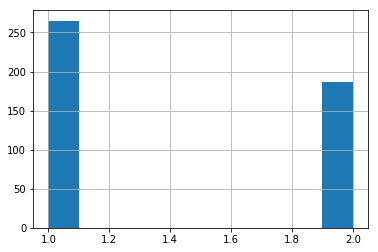

In [52]:
ma = matches['match_date'].value_counts().hist()
print(ma)

### What is relation of toss winning to winning matches for each team ?

In [61]:
c1 = matches.Team1.value_counts().reset_index(name = 'cnt1')
c2 = matches.Team2.value_counts().reset_index(name = 'cnt2')

m1 = c1.merge(c2, on='index')
m1['Total_match'] = m1['cnt1'] + m1['cnt2']
m1.drop(columns=['cnt1','cnt2'], axis=1,inplace=True)

matches[['Toss_Winner','match_winner']]

tw = matches['Toss_Winner'].value_counts().reset_index(name = 'Toss_Won')
mw = matches['match_winner'].value_counts().reset_index(name = 'Matches_Won')

sum1 = tw.merge(mw,on='index').merge(m1,on='index')

sum1['toss_percentage'] = sum1.Toss_Won/sum1.Total_match
sum1['win_percentage'] = sum1.Matches_Won/sum1.Total_match

sum1

,index,Toss_Won,Matches_Won,Total_match,toss_percentage,win_percentage
0,Mumbai Indians,85,91,157,0.541401,0.579618
1,Kolkata Knight Riders,78,77,148,0.527027,0.520270
2,Delhi Daredevils,72,62,147,0.489796,0.421769
3,Royal Challengers Bangalore,70,73,153,0.457516,0.477124
4,Kings XI Punjab,68,70,148,0.459459,0.472973
5,Chennai Super Kings,66,79,131,0.503817,0.603053
6,Rajasthan Royals,63,63,118,0.533898,0.533898
7,Deccan Chargers,43,29,75,0.573333,0.386667
8,Sunrisers Hyderabad,35,42,77,0.454545,0.545455
9,Pune Warriors,20,12,46,0.434783,0.260870


### For each team find higest and narrowest winning margin by wicket and runns.

In [66]:
wins = matches[['match_winner','Win_Type','Win_Margin']]
wins.groupby(['match_winner','Win_Type']).agg(['max','min'])

Win_Margin     
                                            max  min
match_winner                Win_Type                
Chennai Super Kings         runs           97.0  1.0
                            wickets        10.0  3.0
Deccan Chargers             runs           82.0  6.0
                            wickets        10.0  5.0
Delhi Daredevils            runs           97.0  1.0
                            wickets        10.0  2.0
Gujarat Lions               runs            1.0  1.0
                            wickets         7.0  3.0
Kings XI Punjab             Tie             NaN  NaN
                            runs          111.0  1.0
                            wickets        10.0  3.0
Kochi Tuskers Kerala        runs           17.0  6.0
                            wickets         8.0  7.0
Kolkata Knight Riders       runs          140.0  2.0
                            wickets        10.0  1.0
Mumbai Indians              run             1.0  1.0
                            runs          146.0  1.0
                            wickets        10.0  2.0
Pune Warriors               runs           38.0  7.0
                            wickets         7.0  4.0
Rajasthan Royals            Tie             NaN  NaN
                            runs          105.0  2.0
                            wickets        10.0  3.0
Rising Pune Supergiants     runs           61.0  3.0
                            wickets         9.0  4.0
Royal Challengers Bangalore Tie             NaN  NaN
                            runs          144.0  1.0
                            wickets        10.0  2.0
Sunrisers Hyderabad         Tie             NaN  NaN
                            runs           85.0  4.0
                            wickets        10.0  3.0

### What is winning ratio team on its home ground ?

In [67]:
team_name = 'Kolkata Knight Riders'
home_ground = 'Kolkata'

hgm = matches[matches.City_Name == home_ground]

team1 = hgm[['Team1','match_winner']].rename(columns={'Team1': 'Team'})
team2 = hgm[['Team2','match_winner']].rename(columns={'Team2': 'Team'})

match_played = pd.concat([team1,team2])
match_played['won'] = match_played.apply(lambda row : 1 if row['match_winner'] == row['Team'] else 0,axis=1 )

ans1 = match_played.groupby('Team').agg({'won' : 'sum', 'Team':'count'})
ans1.rename(columns = {'Team': 'cnt'})

,won,cnt
Team,,
Chennai Super Kings,4,9
Deccan Chargers,0,3
Delhi Daredevils,1,7
Gujarat Lions,2,2
Kings XI Punjab,2,9
Kochi Tuskers Kerala,1,1
Kolkata Knight Riders,37,58
Mumbai Indians,9,11
Pune Warriors,0,1
